In [44]:
data = {
    'name': ['동원', '영주', '태은', '동건'],
    'age': [32, 30, 29, 27],
    'score': [1 ,3 ,None ,4]
}

In [2]:
import pandas as pd

In [45]:
df = pd.DataFrame(data)

In [46]:
df

,name,age,score
0,동원,32,1.0
1,영주,30,3.0
2,태은,29,NaN
3,동건,27,4.0


In [28]:
df[['age', 'score']].iloc[2:]

,age,score
2,29,2
3,27,4


In [8]:
df['name']

0    동원
1    영주
2    태은
3    동건
Name: name, dtype: object

In [12]:
df.index= ['a', 'b', 'c', 'd']

In [13]:
df

,name,age
a,동원,32
b,영주,30
c,태은,29
d,동건,27


In [17]:
df.loc[['a', 'b']]

,name,age
a,동원,32
b,영주,30


In [20]:
df.iloc[::2]

,name,age
a,동원,32
c,태은,29


In [29]:
df

,name,age,score
0,동원,32,1
1,영주,30,3
2,태은,29,2
3,동건,27,4


In [32]:
df[(df['age'] > 29) & (df['score'] > 2)]

,name,age,score
1,영주,30,3


In [33]:
df.sort_values(by='score')

,name,age,score
0,동원,32,1
2,태은,29,2
1,영주,30,3
3,동건,27,4


In [36]:
df.loc[df['name'] == '동원', 'score'] = 5
df

,name,age,score
0,동원,32,5
1,영주,30,3
2,태은,29,2
3,동건,27,4


In [37]:
df['age'] > 29 

0     True
1     True
2    False
3    False
Name: age, dtype: bool

In [38]:
df['isOld'] = df['age'] > 29

In [42]:
df = df.drop(columns=['isOld'])

In [47]:
df

,name,age,score
0,동원,32,1.0
1,영주,30,3.0
2,태은,29,NaN
3,동건,27,4.0


In [48]:
df.dropna()

,name,age,score
0,동원,32,1.0
1,영주,30,3.0
3,동건,27,4.0


In [49]:
df

,name,age,score
0,동원,32,1.0
1,영주,30,3.0
2,태은,29,NaN
3,동건,27,4.0


In [50]:
import seaborn as sns

In [103]:
df = sns.load_dataset('titanic')

In [54]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
df[df['sex'] == 'female'].groupby('alive')['sex'].count()

alive
no      81
yes    233
Name: sex, dtype: int64

In [75]:
df['age'].median()

np.float64(28.0)

In [86]:
df.groupby(['sex', 'class'])['age'].mean().unstack()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/1382629672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'class'])['age'].mean().unstack()


class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [68]:
df.groupby('class')['fare'].median()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/2238955266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].median()


class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [87]:
pd.pivot_table(
    df, values="age", index="sex", columns = "class", aggfunc="median"
)

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/2997672359.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


class,First,Second,Third
sex,,,
female,35.0,28.0,21.5
male,40.0,30.0,25.0


In [89]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='class', ylabel='fare'>

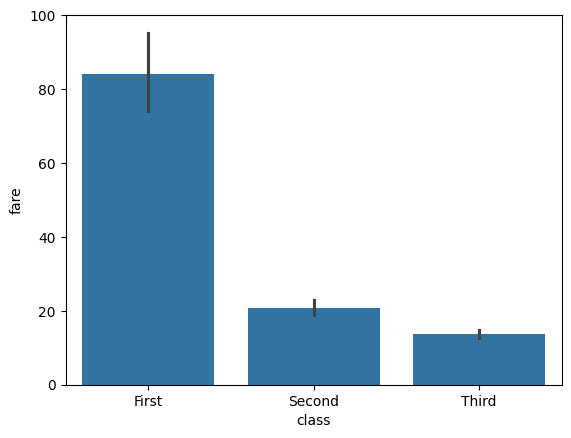

In [92]:
sns.barplot(df, x='class', y='fare')

<Axes: xlabel='class', ylabel='age'>

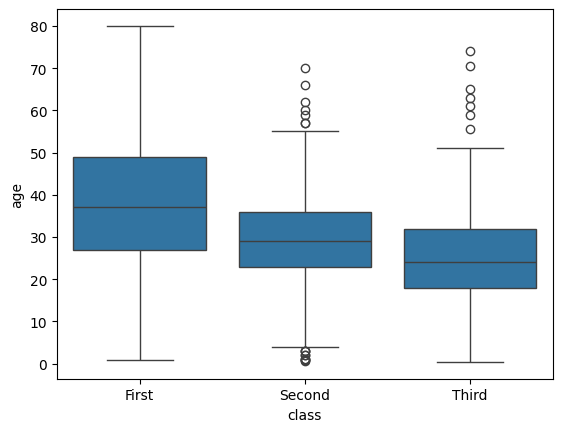

In [93]:
sns.boxplot(df, x='class', y='age')

In [94]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [96]:
pd.crosstab(df['class'], df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


In [150]:
df_imp = df.copy()

In [151]:
age_median = (df_imp.groupby(['sex', 'class'])['age'].transform('median'))

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/313623310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_median = (df_imp.groupby(['sex', 'class'])['age'].transform('median'))


In [152]:
df_imp['age'] = df_imp['age'].fillna(age_median)

In [153]:
df_imp.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

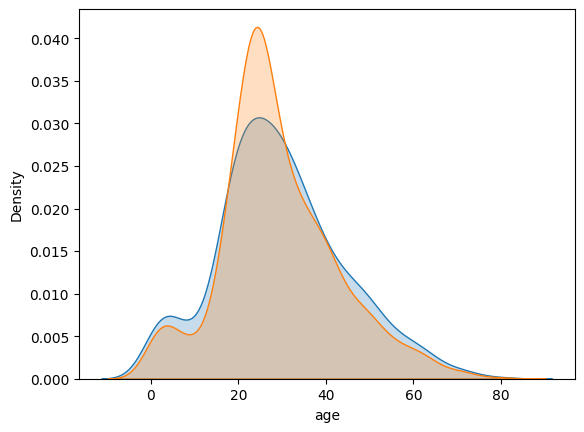

In [154]:
sns.kdeplot(df['age'], label='orig', fill=True)
sns.kdeplot(df_imp['age'], label='imputed', fill=True)

In [155]:
mask = (df_imp['class'] == 'First') & (df_imp['embark_town'].isna())

In [156]:
df_imp.loc[mask, 'embark_town'] = 'Southampton'

In [157]:
df_imp.loc[mask, 'embark_town']

61     Southampton
829    Southampton
Name: embark_town, dtype: object

In [158]:
mask = (df_imp['class'] == 'Second') & (df_imp['embark_town'].isna())
df_imp.loc[mask, 'embark_town'] = 'Southampton'

In [159]:
mask = (df_imp['class'] == 'Third') & (df_imp['embark_town'].isna())
df_imp.loc[mask, 'embark_town'] = 'Southampton'

In [160]:
df_imp['embark_town'].fillna('Southampton')

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [161]:
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [162]:
df_imp['deck'].astype('category')

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [163]:
df_imp['deck'] = df_imp['deck'].cat.add_categories(['Unknown'])

In [164]:
df_imp['deck'] = df_imp['deck'].fillna('Unknown')

In [165]:
df_imp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [166]:
df_imp.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [167]:
df2 = df.copy()

In [170]:
df2['age'].iloc[0] = 'Unknown'

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/3736796341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'].iloc[0] = 'Unknown'
/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/3736796341.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2['age'].iloc[0] = 'Unknown'


In [171]:
df2['age']

0      Unknown
1         38.0
2         26.0
3         35.0
4         35.0
        ...   
886       27.0
887       19.0
888        NaN
889       26.0
890       32.0
Name: age, Length: 891, dtype: object

In [174]:
df2['who'] = df2['who'].astype('category')

In [175]:
df2['who']

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: category
Categories (3, object): ['child', 'man', 'woman']

In [179]:
df2['who'].iloc[0] = 'asdasd'

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_23471/3229500838.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['who'].iloc[0] = 'asdasd'


In [178]:
df2['who']=df2['who'].cat.add_categories(['asdasd'])

In [180]:
df2['who']

0      asdasd
1       woman
2       woman
3       woman
4         man
        ...  
886       man
887     woman
888     woman
889       man
890       man
Name: who, Length: 891, dtype: category
Categories (4, object): ['child', 'man', 'woman', 'asdasd']

<Axes: xlabel='class', ylabel='age'>

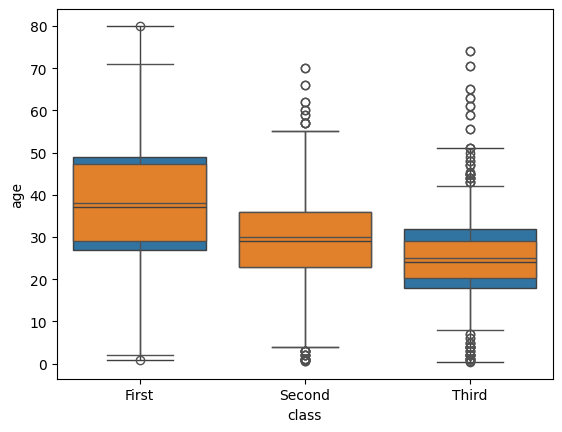

In [182]:
sns.boxplot(df, x='class', y='age')
sns.boxplot(df_imp, x='class', y='age')

In [ ]:
!pip install matplotlib

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
x_line = np.linspace(0, 10, 30)
y_line = np.sin(x_line)

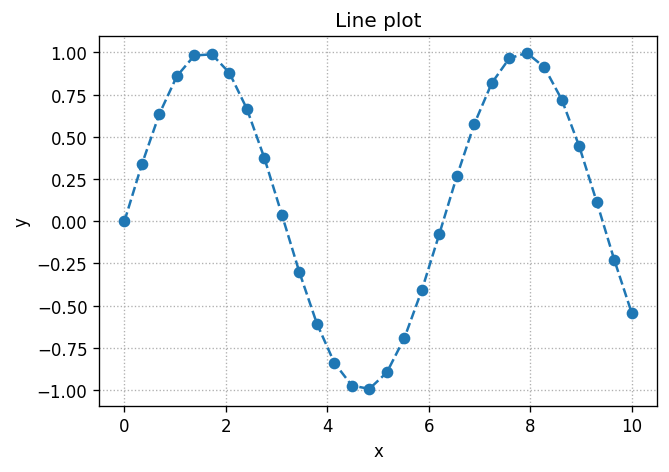

In [192]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.plot(x_line, y_line, marker='o', linestyle='--')
ax.set_title('Line plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, linestyle=':')

In [193]:
x_scatter = np.linspace(0, 10, 60)
y_scatter = 0.7*x_scatter 

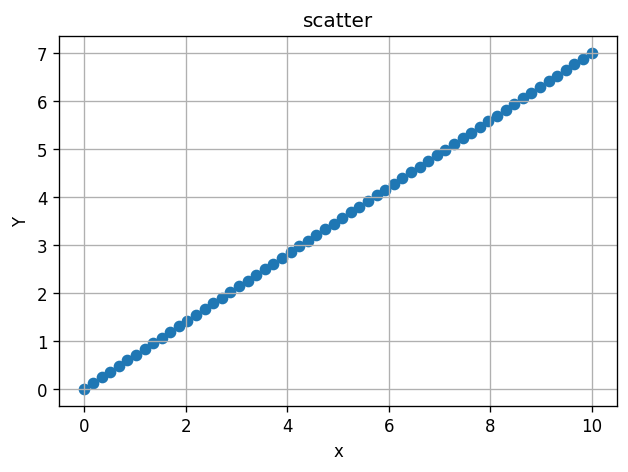

In [201]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(x_scatter, y_scatter)
ax.set_title('scatter')
ax.set_xlabel('x')
ax.set_ylabel('Y')
ax.grid()

In [202]:
categories = ['a', 'b', 'c', 'd']
values = [12, 53, 42, 4]

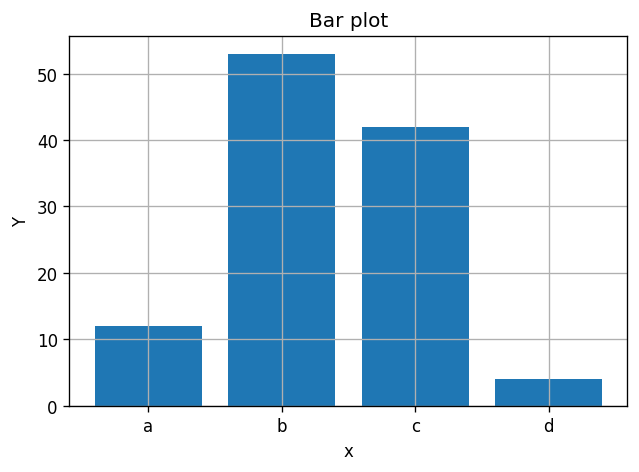

In [206]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.bar(categories, values)
ax.set_title('Bar plot')

ax.set_xlabel('x')
ax.set_ylabel('Y')
ax.grid()

In [207]:

samples_norm = np.random.normal(loc=0, scale=1, size=400)     # 정규분포 표본 400개
box_a = np.random.normal(0.0, 1.0, 200)  # 그룹 A 분포
box_b = np.random.normal(1.5, 0.8, 200)  # 그룹 B 분포(평균↑, 분산↓)
box_c = np.random.normal(3.0, 1.2, 200)  # 그룹 C 분포(평균↑, 분산↑)

(array([ 3.,  0.,  6.,  6., 10., 21., 18., 36., 43., 40., 40., 34., 46.,
        40., 24., 14.,  6.,  7.,  5.,  1.]),
 array([-2.932428  , -2.65710476, -2.38178151, -2.10645826, -1.83113502,
        -1.55581177, -1.28048853, -1.00516528, -0.72984203, -0.45451879,
        -0.17919554,  0.09612771,  0.37145095,  0.6467742 ,  0.92209745,
         1.19742069,  1.47274394,  1.74806719,  2.02339043,  2.29871368,
         2.57403693]),
 <BarContainer object of 20 artists>)

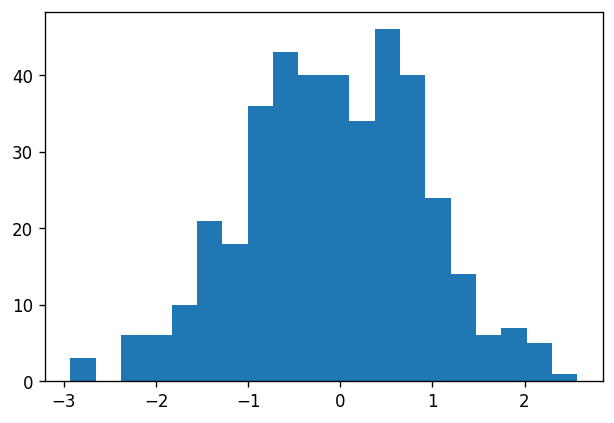

In [208]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.hist(samples_norm, bins=20)


{'whiskers': [<matplotlib.lines.Line2D at 0x1735437d0>,
 'caps': [<matplotlib.lines.Line2D at 0x172c85010>,
 'boxes': [<matplotlib.lines.Line2D at 0x172c85640>,
 'medians': [<matplotlib.lines.Line2D at 0x172c84fb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x172c84fe0>,
 'means': []}

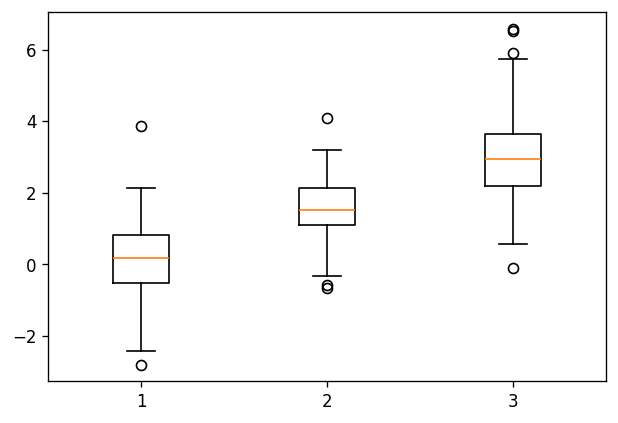

In [209]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.boxplot([box_a, box_b, box_c], label=["groub a", "groub b", "group c"])


<Axes: xlabel='x', ylabel='y'>

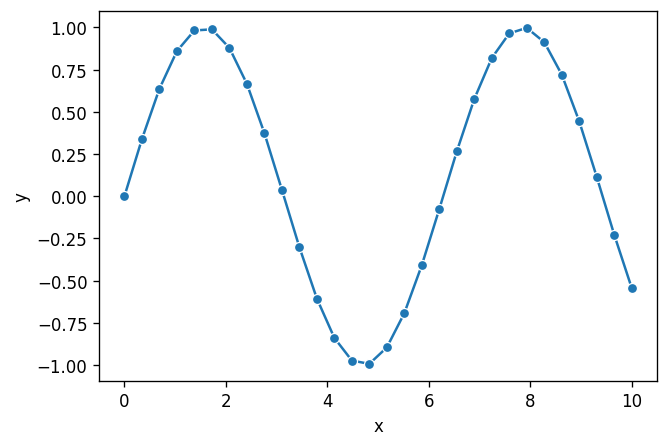

In [214]:
df_line = pd.DataFrame({"x": x_line, "y": y_line})

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
sns.lineplot(data=df_line, x='x', y='y', marker='o', ax=ax)

In [216]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Count'>

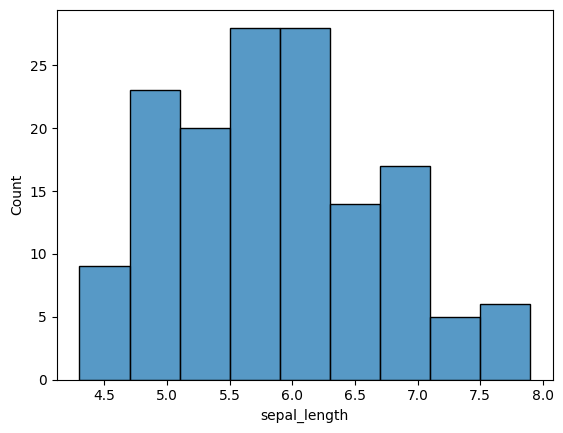

In [217]:
sns.histplot(iris, x='sepal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

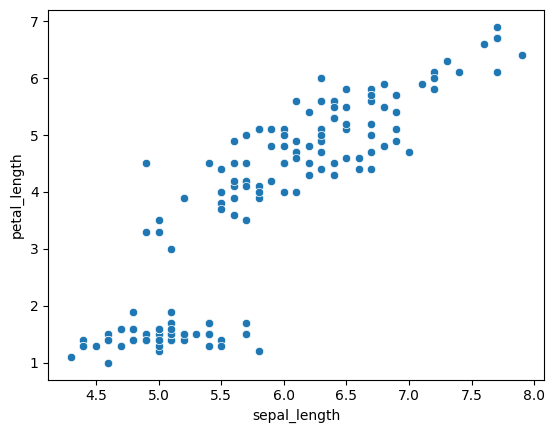

In [218]:
sns.scatterplot(iris, x='sepal_length', y='petal_length')

In [219]:
num = iris.select_dtypes('number')

In [221]:
corr = num.corr()

In [222]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correation martix')

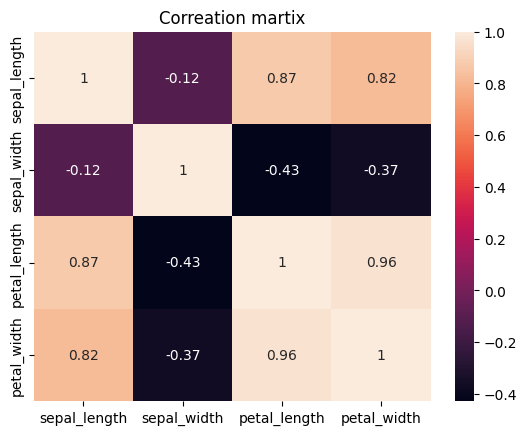

In [225]:
sns.heatmap(corr, annot=True)
plt.title('Correation martix')

In [229]:
df = df.select_dtypes('number')
corr = df.corr()

<Axes: >

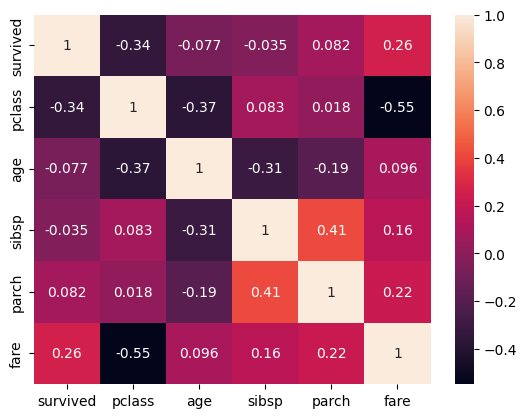

In [230]:
sns.heatmap(corr, annot=True)

In [ ]:
pd.read_csv('tr')